<a href="https://colab.research.google.com/github/Meetu-kaur/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#How to extract real time database

Twitter Sentiment analysis consist of classifying tweets if they are sexist, racist etc, or not.

In [28]:
#Importing Libraries

In [29]:
import tweepy

In [30]:
import json

In [31]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
pd.set_option('display.max_colwidth',200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [33]:
#Read train and test datasets

In [34]:
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [35]:
#Data Inspection

In [36]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [37]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [38]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [39]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [40]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

Checking the distribution of length of tweets

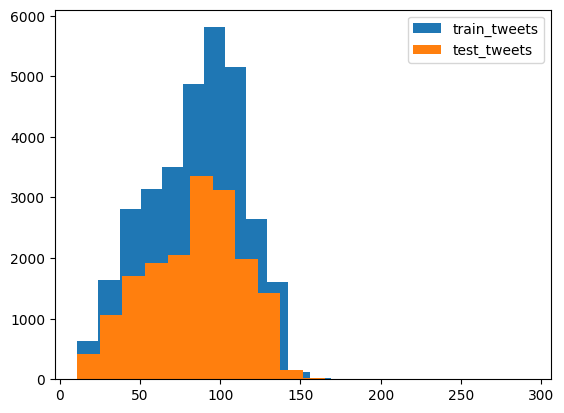

In [41]:
train_length = train['tweet'].str.len()
test_length = test['tweet'].str.len()
plt.hist(train_length,bins=20, label="train_tweets")
plt.hist(test_length, bins=20, label= "test_tweets")
plt.legend()
plt.show()

In [42]:
combination_train_test = train.append(test,ignore_index = True, sort = False)
combination_train_test.shape

<ipython-input-42-586e0f57dfec>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combination_train_test = train.append(test,ignore_index = True, sort = False)


(49159, 3)

In [43]:
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern,input_txt)
  for i in r:
    input_txt = re.sub(i,"", input_txt)
  return input_txt